#Face Detection mit OpenCV cascade filters
update: 2024-01-22


In [1]:
# Clone the repository
!git clone --depth 1 https://github.com/IPHOS-RWU/3DMV

Cloning into '3DMV'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 57 (delta 6), reused 57 (delta 6), pack-reused 0
Receiving objects: 100% (57/57), 4.41 MiB | 11.60 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

**Images**

In [3]:
nadia = cv2.imread('3DMV/images/Nadia_Murad.jpg', cv2.IMREAD_GRAYSCALE)
denis = cv2.imread('3DMV/images/Denis_Mukwege.jpg', cv2.IMREAD_GRAYSCALE)
solvay = cv2.imread('3DMV/images/solvay_conference.jpg', cv2.IMREAD_GRAYSCALE)

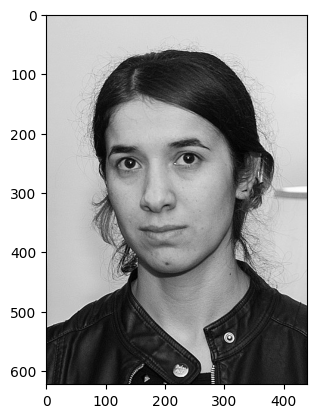

In [4]:
plt.imshow(nadia,cmap='gray')


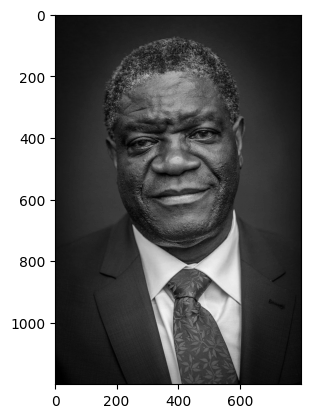

In [5]:
plt.imshow(denis,cmap='gray')

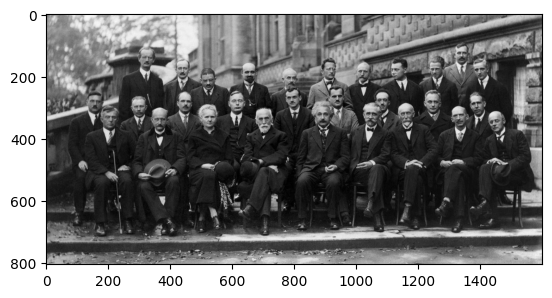

In [6]:
plt.imshow(solvay,cmap='gray')

## Cascade Files

In OpenCV findet man vorab trainierte Kaskadendateien für die Gesichterkennung.

## Face Detection

In [7]:
face_cascade = cv2.CascadeClassifier('3DMV/images/haarcascades/haarcascade_frontalface_default.xml')

Die Funktion detect_face ruft den Detektor auf und visualisiert das Ergebnis

In [8]:
def detect_face(img):


    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10)

    return face_img

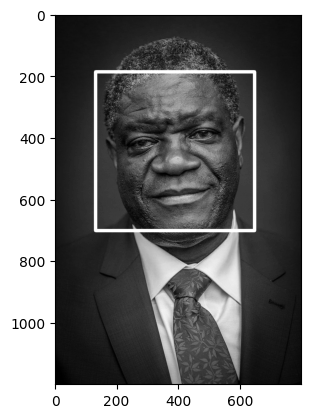

In [9]:
result = detect_face(denis)
plt.imshow(result,cmap='gray')

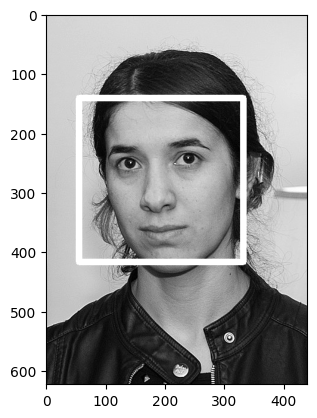

In [10]:
result = detect_face(nadia)
plt.imshow(result,cmap='gray')

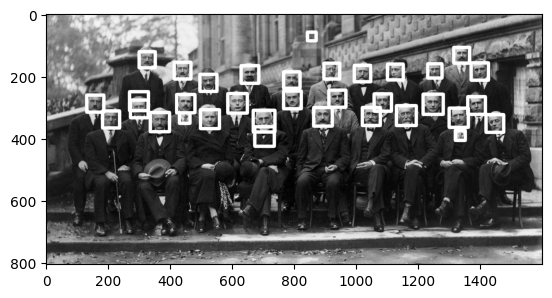

In [12]:
result = detect_face(solvay)
plt.imshow(result,cmap='gray')
# nicht alle Ergebnisse sind korrekt!

In [13]:
def adj_detect_face(img):

    face_img = img.copy()

    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5)

    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10)

    return face_img


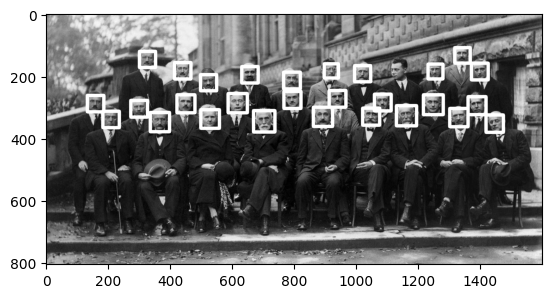

In [15]:
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')
# das seitliche Gesicht wird nicht erkannt.

##Face and Smile Detection

In [39]:
face_cascade = cv2.CascadeClassifier('3DMV/images/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('3DMV/images/haarcascades/haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('3DMV//images/haarcascades/haarcascade_smile.xml')

In [53]:
def detect(img):
  img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  faces = face_cascade.detectMultiScale(img_gray)
  for (x, y, w, h) in faces:
    # Ausschnitte kopieren
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+h]
    # Gesicht markieren
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Nach Augen suchen
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 22)
    for (ex, ey, ew, eh) in eyes:
      cv2.rectangle(roi_color, (ex, ey),(ex+ew, ey+eh), (0, 255, 0), 2)

    # Nach Smile suchen
    smiles = smile_cascade.detectMultiScale(roi_gray, 1.7, 22)
    for (sx, sy, sw, sh) in smiles:
      cv2.rectangle(roi_color, (sx, sy),(sx+sw, sy+sh), (0, 0, 255), 2)

In [52]:
# wir laden jetzt das Farbbild und wandeln es in das RGB Format
nadia = cv2.imread('3DMV/images/Nadia_Murad.jpg')
nadia = cv2.cvtColor(nadia, cv2.COLOR_BGR2RGB)

print(nadia.shape)


(623, 440, 3)


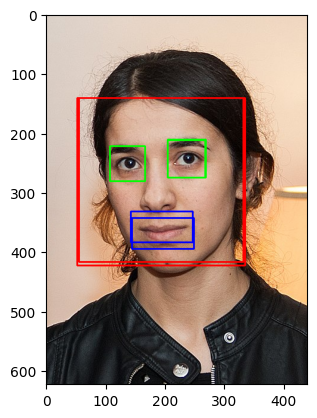

In [55]:
detect(nadia)
plt.imshow(nadia)

In [57]:
therock = cv2.imread('3DMV/images/therock.jpg')
therock = cv2.cvtColor(therock, cv2.COLOR_BGR2RGB)

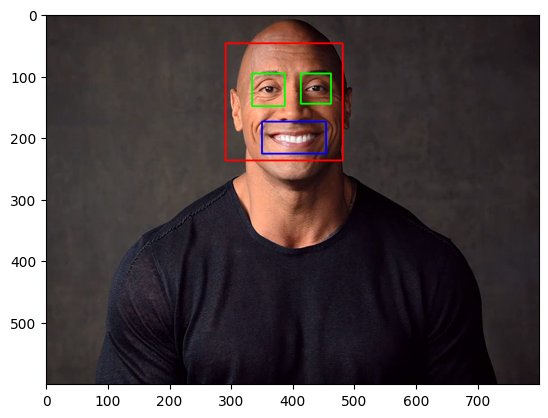

In [58]:
detect(therock)
plt.imshow(therock)